# Analyse d’un jeu de données PhD


## Aperçu
1. Présentation des données.
2.  Données manquantes.
3. Principaux problèmes détectés.
4. Outliers et résultats anormaux.
5. . Résultats préliminaires.


# I. Présentation des données

## 1. Charger et Prétraiter les Données

### Charger les bibliothèques nécessaires et le jeu de données

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# specifier l'emplacement du fichier
files = 'C:/Users/KRISTIAN/Desktop/Cy cergy pontoise/Manipulation et prétraitement de données/Données/PhD_v4.csv'

# Charger le fichier csv
df = pd.read_csv(files, sep='\t', encoding='utf-8', low_memory=False)



### Afficher le nombre de lignes et de coonnes de ma donnée

In [3]:
df.shape

(448578, 24)

In [4]:
# Afficher les differentes colonnes
df.columns

Index(['Unnamed: 0', 'index', 'Auteur', 'Identifiant auteur', 'Titre',
       'Directeur de these', 'Directeur de these (nom prenom)',
       'Identifiant directeur', 'Etablissement de soutenance',
       'Identifiant etablissement', 'Discipline', 'Statut',
       'Date de premiere inscription en doctorat', 'Date de soutenance',
       'Year', 'Langue de la these', 'Identifiant de la these',
       'Accessible en ligne', 'Publication dans theses.fr',
       'Mise a jour dans theses.fr', 'Discipline_prÃ©di', 'Genre',
       'etablissement_rec', 'Langue_rec'],
      dtype='object')

In [5]:
# Définir les options pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes
pd.set_option('display.expand_frame_repr', False)  # Ne pas résumer la table

# Afficher les deux premières lignes avec toutes les colonnes
df.head(2)

,Unnamed: 0,index,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_prÃ©di,Genre,etablissement_rec,Langue_rec
0,0,0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,enCours,30-09-11,NaN,NaN,na,s69480,non,26-01-12,26-01-12,Droit et Science Politique,male,Université Paris 1 - Panthéon Sorbonne,NaN
1,1,1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",enCours,01-10-12,NaN,NaN,na,s98826,non,22-11-13,22-11-13,"Materiaux, Milieux et Chimie",female,École nationale supérieure de mécanique et d'a...,NaN


On constate que les colonnes 'Unnamed: 0' et 'index' sont les index qui ont été générés lors du précédent nettoyage de la base de données. Nous avons supprimé la colonne 'index', utilisé la colonne 'Unnamed: 0' pour l’index de notre base de données et aussi renommer la colonnes 'Discipline_prÃ©di' qui est une erreur d'écriture.

In [6]:
df = pd.read_csv(files, sep='\t', encoding='utf-8', index_col=0, low_memory=False)
# Supression de la colonne "ndex"
df = df.drop(columns=['index'])
# Rename the column 'Discipline_prÃ©di' to 'Discipline_predi'
df = df.rename(columns={'Discipline_prÃ©di': 'Discipline_predi'})


In [7]:
df.head(2)

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_predi,Genre,etablissement_rec,Langue_rec
0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,enCours,30-09-11,NaN,NaN,na,s69480,non,26-01-12,26-01-12,Droit et Science Politique,male,Université Paris 1 - Panthéon Sorbonne,NaN
1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",enCours,01-10-12,NaN,NaN,na,s98826,non,22-11-13,22-11-13,"Materiaux, Milieux et Chimie",female,École nationale supérieure de mécanique et d'a...,NaN


### Résumé des différentes variables

In [8]:
# Résumé statistique des variables numériques
df.describe()


,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_predi,Genre,etablissement_rec,Langue_rec
count,448578,318092,448571,448542,448542,448531,448554,431463,448555,448553,64438,391370,391368,448555,448555,448555,448555,447847,448024,448019,444945,383908
unique,430767,314161,447344,159156,159158,99355,570,650,24287,6,4093,4132,59,741,447544,152,2821,2639,18,7,111,4
top,Nicolas Martin,",",#NAME?,Directeur de these inconnu,Directeur de these inconnu,na,Paris 6,27787087,Medecine,soutenue,01-10-18,01-01-94,2012.0,fr,non,non,24-05-13,07-07-20,Biologie,male,Sorbonne Université,Français
freq,16,462,17,713,713,49486,21213,20927,25914,381756,1500,12990,13991,334427,421,347673,205870,61845,100203,207625,33495,334427


In [9]:
# Informations générales sur toutes les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448578 entries, 0 to 28
Data columns (total 22 columns):
 #   Column                                    Non-Null Count   Dtype 
---  ------                                    --------------   ----- 
 0   Auteur                                    448578 non-null  object
 1   Identifiant auteur                        318092 non-null  object
 2   Titre                                     448571 non-null  object
 3   Directeur de these                        448542 non-null  object
 4   Directeur de these (nom prenom)           448542 non-null  object
 5   Identifiant directeur                     448531 non-null  object
 6   Etablissement de soutenance               448554 non-null  object
 7   Identifiant etablissement                 431463 non-null  object
 8   Discipline                                448555 non-null  object
 9   Statut                                    448553 non-null  object
 10  Date de premiere inscription en doctorat 

Les types de données actuels de toutes les colonnes sont "object", ce qui signifie que pandas considère chaque valeur comme une chaîne de caractères ou un objet générique. Cependant, certaines de ces colonnes devraient probablement être d'autres types de données, tels que des dates ou des nombres, pour permettre des analyses plus précises et des opérations mathématiques ou de comparaison. Nous allons pour la suite traiter les colonnes pour qu'elles puissent correspondre à leurs types :

- **Date de premiere inscription en doctorat** et **Date de soutenance** : Ces colonnes devraient être converties en type `datetime` pour permettre une manipulation facile des dates.
- **Year, Identifiant auteur, Identifiant directeur, Identifiant etablissement** : Ces colonnes pourraient être converties en type `int`.
- **Statut, Langue de la these, Accessible en ligne, Publication dans theses.fr, Mise a jour dans theses.fr, Genre, etablissement_rec, Langue_rec** : Ces colonnes peuvent rester de type 'object'.

### Conversion des Types de Données de Certaines Colonnes 

Dans cette partie, nous allons convertir certaines colonnes dans leurs types appropriés sans traiter les valeurs manquantes.

In [10]:
# Conversion des colonnes de date
date_columns = ['Date de premiere inscription en doctorat', 'Date de soutenance']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%d-%m-%y', errors='coerce')


In [11]:
df['Year'].unique()

 


array([nan, '1993.0', '2008.0', '2005.0', '2009.0', '2013.0', '2011.0',
       '2010.0', '2007.0', '2012.0', '2006.0', '2004.0', '2001.0',
       '2015.0', '2014.0', '2016.0', '1995.0', '1997.0', '1986.0',
       '1992.0', '1991.0', '1987.0', '1988.0', '1998.0', '1999.0',
       '1985.0', '1996.0', '1994.0', '2002.0', '2000.0', '1990.0',
       '1989.0', '2003.0', '1982.0', '1972.0', '1971.0', '1976.0',
       '1973.0', '2017.0', '1984.0', 'fr', '2018.0', 'non', 's210382',
       '2019.0', '2020.0', '1980.0', 'oui', '1979.0', 'en', 'enfr',
       'fren', 'es', 'fres', 'frla', 'pt', 'frhu', 'it', 'arfr', 'frru'],
      dtype=object)

In [12]:
# Remplacer les valeurs problématiques par NaN
df['Year'] = df['Year'].replace(['fr','en','fren','enfr','es','non','pt','frhu','frla','fres','it','arfr','oui','s210382','frru '], np.nan)

# Puis, convertir en numérique
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Convertir en entier tout en conservant les NaN
df['Year'] = df['Year'].astype(pd.Int64Dtype())


In [13]:
# Inpection de la colonne 'Identifiant directeur'
df['Identifiant directeur'].value_counts()

Identifiant directeur
na           49486
1             1057
7              718
3              711
8              618
             ...  
08092624X        1
52194973         1
33023581         1
59213507         1
027084671        1
Name: count, Length: 99355, dtype: int64

In [14]:
# Remplacer les valeurs problématiques par NaN
df['Identifiant directeur'] = df['Identifiant directeur'].replace(['08092624X', 'na'], np.nan)

# Puis, convertir en numérique
df['Identifiant directeur'] = pd.to_numeric(df['Identifiant directeur'], errors='coerce')

# Convertir en entier tout en conservant les NaN
df['Identifiant directeur'] = df['Identifiant directeur'].astype(pd.Int64Dtype())

In [15]:
# Inpection de la colonne 'Identifiant auteur'
df['Identifiant auteur'].value_counts()

Identifiant auteur
,             462
,05990190X     12
148538681       9
185212417       8
185221734       8
             ... 
241684668       1
241942365       1
237786400       1
241940435       1
61556203        1
Name: count, Length: 314161, dtype: int64

In [16]:
# Remplacer les valeurs problématiques par NaN

df['Identifiant auteur'] = df['Identifiant auteur'].replace([',', ',05990190X'], np.nan)

# Puis, convertir en numérique
df['Identifiant auteur'] = pd.to_numeric(df['Identifiant auteur'], errors='coerce')

# Convertir en entier tout en conservant les NaN
df['Identifiant auteur'] = df['Identifiant auteur'].astype(pd.Int64Dtype())


In [17]:
# Inpection de la colonne 'Identifiant etablissement'
df['Identifiant etablissement'].value_counts()

Identifiant etablissement
27787087     20927
26404664     15344
27361802     14349
27542084     11083
26404672      9556
             ...  
151384134        1
128800895        1
26627388         1
26567598         1
32613822         1
Name: count, Length: 650, dtype: int64

In [18]:
# convertir en numérique
df['Identifiant etablissement'] = pd.to_numeric(df['Identifiant etablissement'], errors='coerce')

# Convertir en entier tout en conservant les NaN
df['Identifiant etablissement'] = df['Identifiant etablissement'].astype(pd.Int64Dtype())

In [19]:
# Charger les données traitées partiellement dans data
data=df

### Visualiser les types de donneé apres les differntes modifications

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448578 entries, 0 to 28
Data columns (total 22 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Auteur                                    448578 non-null  object        
 1   Identifiant auteur                        288202 non-null  Int64         
 2   Titre                                     448571 non-null  object        
 3   Directeur de these                        448542 non-null  object        
 4   Directeur de these (nom prenom)           448542 non-null  object        
 5   Identifiant directeur                     304564 non-null  Int64         
 6   Etablissement de soutenance               448554 non-null  object        
 7   Identifiant etablissement                 396965 non-null  Int64         
 8   Discipline                                448555 non-null  object        
 9   Statut                  

In [21]:
# Visaliser la statistique 
data.describe()

,Identifiant auteur,Identifiant directeur,Identifiant etablissement,Date de premiere inscription en doctorat,Date de soutenance,Year
count,288202.0,304564.0,396965.0,64322,390942,390942.0
mean,138248386.130058,62958843.408955,53542069.111035,2015-09-15 17:18:15.525636608,2003-06-09 08:40:49.615543808,2003.249492
min,26648148.0,1.0,26364700.0,1976-12-01 00:00:00,1971-01-01 00:00:00,1971.0
25%,83405809.5,29713595.0,26403552.0,2013-12-01 00:00:00,1994-01-01 00:00:00,1994.0
50%,143784556.0,58596690.0,26404664.0,2016-11-14 00:00:00,2004-01-01 00:00:00,2004.0
75%,185078428.75,77798422.0,27960250.0,2018-09-12 00:00:00,2012-06-25 00:00:00,2012.0
max,248077481.0,992000000.0,241345251.0,2020-09-01 00:00:00,2020-07-07 00:00:00,2020.0
std,60851138.690908,44576218.661995,60221486.608607,NaN,NaN,9.845777


# II. Données manquantes

### Visualisation des données manquante dans les colonnes

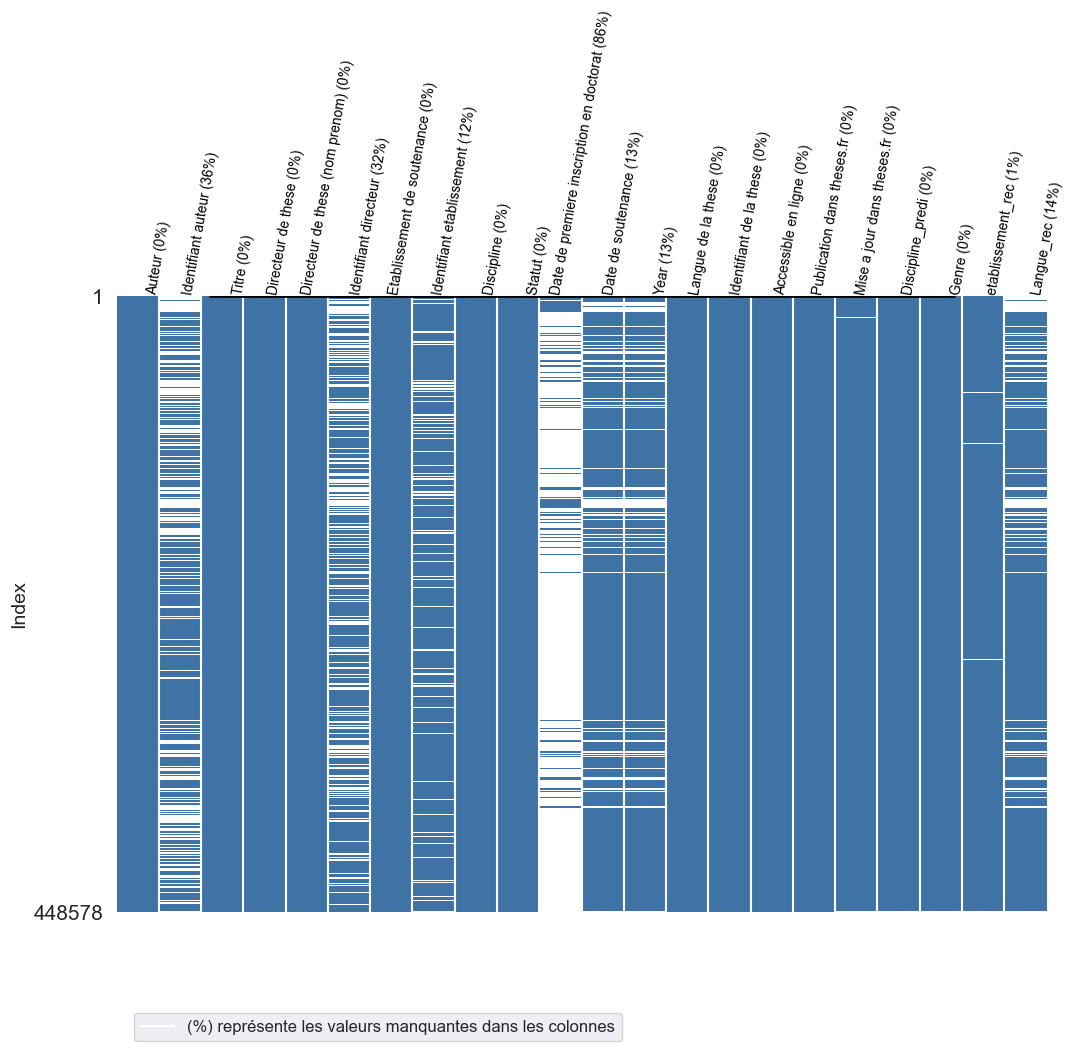

In [22]:
# Définir le style Seaborn
sns.set(style='darkgrid')

# Visualiser les données manquantes avec personnalisation
fig, ax = plt.subplots(figsize=(12, 8))
msno.matrix(data, ax=ax, fontsize=12, sparkline=False, color=(0.25, 0.45, 0.65), labels=True)

# Calculer les pourcentages de valeurs manquantes par colonne
missing_percent = data.isnull().mean() * 100


# Ajouter les pourcentages au graphique avec une annotation explicite
for i, col in enumerate(data.columns):
    xpos = i + 0.5  # Centrer le texte au milieu de la barre
    ax.text(xpos, -0.5, f'{col} ({missing_percent[col]:.0f}%)', rotation=80, ha='center', va='bottom', fontsize=10, color='black')

# Ajouter une ligne sous le graphique avec les pourcentages
plt.axhline(y=-1.5, xmin=0.1, xmax=0.9, color='black', linestyle='-', linewidth=2)  # Ajustez la position y selon vos besoins

# Ajouter une légende pour indiquer que le pourcentage représente les valeurs manquantes
plt.legend(['(%) représente les valeurs manquantes dans les colonnes'], loc='upper left', bbox_to_anchor=(0.01, -0.15), fontsize=12)

# Supprimer les autres éléments non nécessaires
ax.set_xticks([])  # Supprimer les marqueurs de l'axe des x
ax.set_xlabel('')  # Supprimer le label de l'axe des x

plt.ylabel('Index', fontsize=14)

# Sauvegarder l'image en fichier
# plt.savefig('figure_missing_data.png', bbox_inches='tight')

# Afficher le graphique
plt.show()


**1. Analyse des données manquantes:**

Notre figure a révélé des proportions significatives de valeurs manquantes dans plusieurs variables clés. 

* **Date de première inscription en doctorat (86%)**: Ce taux élevé de données manquantes (plus des trois quarts) indique un problème majeur de collecte ou d'enregistrement des données pour cette variable. 
* **Identifiant auteur (36%)** et **Identifiant directeur (32%)**: Un tiers des données manquantes pour ces identifiants peut entraver la liaison précise des thèses à leurs auteurs ou directeurs respectifs.
* **Langue_rec (14%)**, **Date de soutenance (13%)** et **Year (13%)**: Ces variables présentent également des proportions notables de données manquantes, ce qui peut affecter les analyses temporelles ou linguistiques.

**2. Variables avec peu ou pas de données manquantes:**

Heureusement, la majorité des autres variables, telles que **Auteur, Titre, Directeur de thèse, Discipline**, etc., ne présentent pas de données manquantes. Cela indique une bonne qualité des données pour ces attributs, ce qui est favorable pour les analyses basées sur ces informations.

**3. Implications:**

Les données manquantes ont des implications potentielles importantes pour différentes analyses:

* **Analyse de parcours doctoral**: Le taux élevé de données manquantes pour la date de première inscription en doctorat pourrait compromettre les analyses nécessitant des informations sur la durée des études ou les parcours des doctorants.
* **Fiabilité des identifiants**: Les identifiants manquants pour les auteurs et directeurs peuvent compliquer les analyses visant à évaluer la productivité ou les collaborations.
* **Analyses temporelles et linguistiques**: Les données manquantes pour les dates et les langues peuvent affecter les études basées sur les temporalités et les langues des thèses.

**Remarque**: Il est important de souligner que les données manquantes ne seront pas traitées dans le cadre de l'analyse actuelle. Cette analyse vise uniquement à identifier et à quantifier les données manquantes afin de mieux comprendre leurs implications potentielles.

### Comparaison des données manquantes dans les thèses "enCours" et "soutenues" : une analyse par heatmap

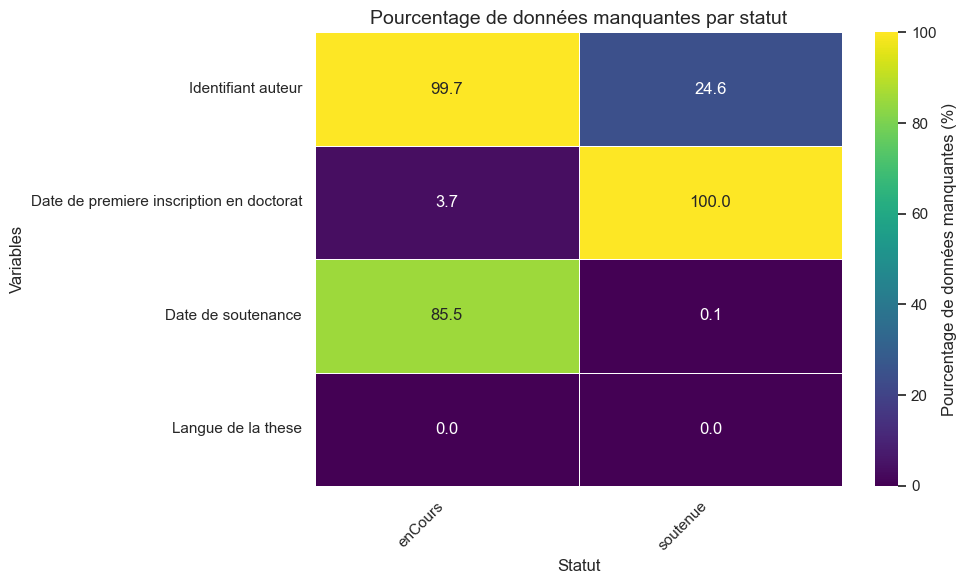

In [23]:

# Sélectionner les variables pertinentes
variables_selectionnees = ['Identifiant auteur', 'Date de premiere inscription en doctorat', 'Date de soutenance', 'Langue de la these']

# Créer une copie avec les variables sélectionnées et le 'Statut'
these_dates_statut = data[['Statut'] + variables_selectionnees].copy()

# Calculer le pourcentage de données manquantes par statut
comptes_manquants = these_dates_statut.isna().groupby(these_dates_statut['Statut']).mean() * 100

# Sélectionner uniquement les statuts pertinents
comptes_manquants = comptes_manquants.loc[['enCours', 'soutenue'], variables_selectionnees]

# Créer la heatmap avec une esthétique améliorée
plt.figure(figsize=(10, 6))
sns.heatmap(comptes_manquants.transpose(), annot=True, cmap='viridis', fmt=".1f", linewidths=.5, cbar_kws={'label': 'Pourcentage de données manquantes (%)'})

# Ajouter un titre et des étiquettes
plt.title('Pourcentage de données manquantes par statut', fontsize=14)
plt.xlabel('Statut', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Faire pivoter les étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster l'espacement pour une meilleure apparence visuelle
plt.tight_layout()

# Afficher le graphique
plt.show()


**Analyse des données manquantes**

1. **Identifiant auteur**:
   - Les données sont manquantes pour environ 99.7% des thèses en cours.
   - Les données sont manquantes pour environ 24.6% des thèses soutenues.

2. **Date de première inscription en doctorat**:
   - Les données sont manquantes pour 100% des thèses soutenues.
   - Les données sont manquantes pour environ 3.7% des thèses en cours.

3. **Date de soutenance**:
   - Les données sont manquantes pour environ 85.5% des thèses en cours.
   - Les données sont présentes pour presque toutes les thèses soutenues.

4. **Langue de la thèse**:
   - Les données sont complètes pour toutes les thèses, qu'elles soient en cours ou soutenues.

**Interprétation des régularités et des patterns**

1. **Thèses en cours**:
   - Les thèses en cours ont une forte proportion de données manquantes pour les dates de soutenance (85.5%) et une proportion élevée mais moindre pour les dates de première inscription (3.7%). Cela peut être dû au fait que les thèses en cours n'ont pas encore de date de soutenance définie et que certaines informations initiales ne sont pas encore complètes.

2. **Thèses soutenues**:
   - Pour les thèses soutenues, les données de date de soutenance sont presque complètes, tandis que les identifiants d'auteur manquent encore dans une certaine proportion (24.6%). Cela peut s'expliquer par des omissions ou des erreurs dans l'enregistrement des données d'identification de l'auteur.

En observant ces régularités, nous pouvons conclure que la complétude des données varie fortement en fonction du statut de la thèse. Les thèses en cours sont les plus susceptibles d'avoir des données manquantes.

# III Détection d’un problème dans les données


### Visualiser la distribution des mois de soutenance de thèse

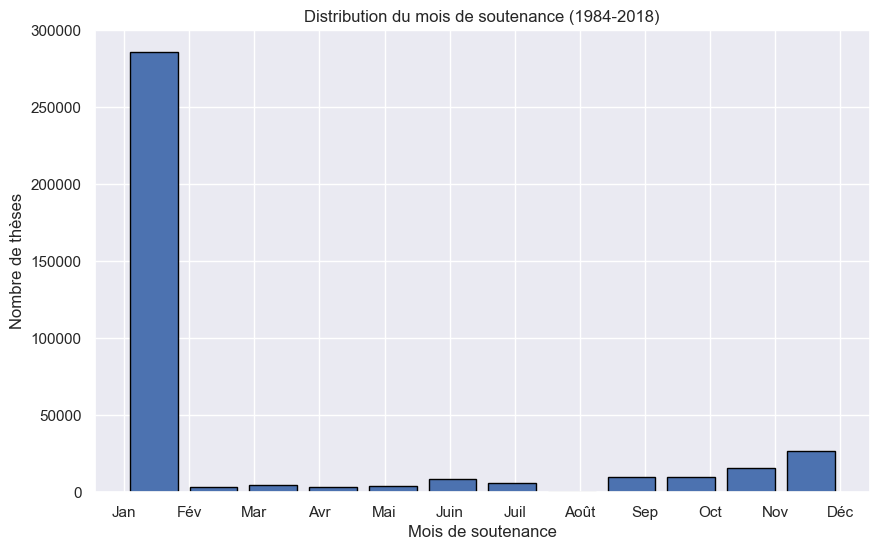

In [24]:

# Extract the Date de soutenance colones
defense_dates = data['Date de soutenance']

# Filter the data for the period 1984-2018
defense_dates = defense_dates[(defense_dates.dt.year >= 1984) & (defense_dates.dt.year <= 2018)]

# Extract the month from the dates
defense_months = defense_dates.dt.month

# Create a histogram of the defense months
plt.figure(figsize=(10, 6))
plt.hist(defense_months.dropna(), bins=12, edgecolor='black', align='mid', rwidth=0.8)

plt.xlabel('Mois de soutenance')
plt.ylabel('Nombre de thèses')
plt.title('Distribution du mois de soutenance (1984-2018)')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])

# plt.savefig('figure3.png', bbox_inches='tight')
plt.show()


La figure 3 montre la distribution du mois de soutenance (1984-2018)

Le choix de s'arrêter en 2018 pour analyser la distribution des mois de soutenance s'explique par plusieurs raisons :

1. **Disponibilité des données** : L'accès aux données de soutenance de thèse après 2018 était limité au moment de l'analyse, ce qui a restreint l'ensemble des données utilisables jusqu'à cette année.

2. **Pertinence historique** : L'objectif de l'étude était d'examiner les tendances historiques sur une période de 34 ans. L'année 2018 représente un point de terminaison pertinent, permettant une analyse longitudinale substantielle tout en restant dans des limites gérables.

3. **Stabilité des tendances** : Limiter l'analyse à l'année 2018 permet de se concentrer sur une période où les tendances de soutenance de thèse étaient relativement stables, minimisant ainsi l'impact des fluctuations ou des changements récents qui pourraient introduire des biais ou des variations non représentatives.

4. **Simplicité et clarté des résultats** : Réduire la période d'analyse facilite le traitement des données et aide à obtenir des résultats plus clairs et plus précis, en évitant la complexité ajoutée par les données les plus récentes qui peuvent être incomplètes ou encore en cours de mise à jour.

**Interprétation des résultats de la distribution des mois de soutenance**

- **Période de soutenance privilégiée** : 
    - **Janvier (285801 soutenances)** : Clairement, janvier est de loin le mois le plus fréquent pour les soutenances de thèse, avec un nombre extrêmement élevé par rapport aux autres mois.
    - **Décembre (26937 soutenances)** : Le deuxième mois le plus fréquent pour les soutenances, bien que nettement moins fréquent que janvier.
    - Les mois de novembre (15548), octobre (10142), et septembre (10023) suivent, indiquant une activité soutenue vers la fin de l'année civile et le début de l'année académique.

- **Influence des vacances et des périodes académiques** :
    - **Vacances d'été et de Noël** : On observe un creux notable en juillet (5991) et août (322), ce qui correspond aux vacances d'été, période durant laquelle les soutenances sont beaucoup moins fréquentes.
    - **Périodes académiques** : Les mois de janvier et décembre sont souvent utilisés pour clôturer les projets de thèse avant les vacances d'hiver et la fin de l'année académique. Les mois d'octobre et novembre, juste après la rentrée académique, sont également populaires pour les soutenances.

- **Tendances et anomalies** :
    - **Janvier** : Le pic extrêmement élevé en janvier pourrait être dû à des pratiques institutionnelles ou des calendriers académiques spécifiques encourageant la soutenance à ce moment-là.
    - **Août** : Le nombre très bas de soutenances en août (322) peut être attribué aux vacances d'été, où la plupart des activités académiques sont au ralenti.
    - **Mars, avril, mai et juin** : Ces mois montrent une activité modérée mais constante, indiquant qu'il y a une distribution relativement équilibrée des soutenances en dehors des périodes de vacances.


# Représentation de la distribution du mois de soutenance pour chaque année, de 2005 à 2018

<Figure size 1400x1000 with 0 Axes>

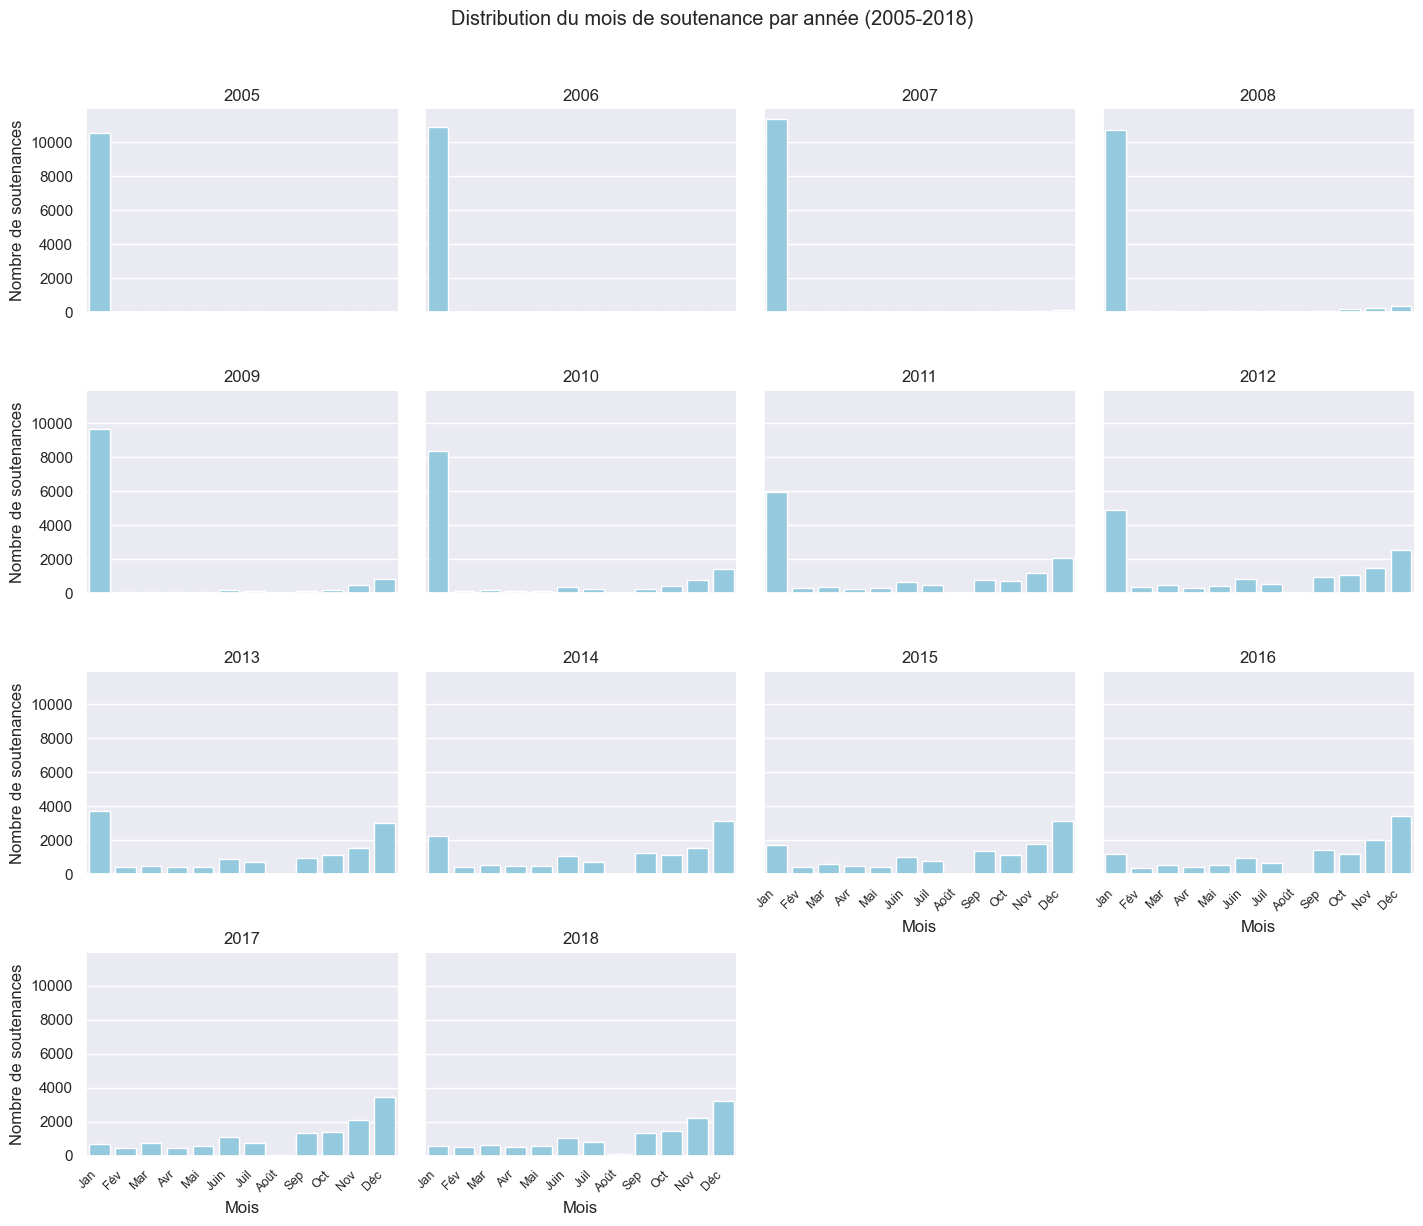

In [25]:
# Extraire de la colonne 'Date de soutenance' l'année et le mois
data['Année'] = data['Date de soutenance'].dt.year
data['Mois'] = data['Date de soutenance'].dt.month

# Filtrer les années entre 2005 et 2018 et supprimer les lignes avec NA
data = data[(data['Année'].notna()) & (data['Mois'].notna())]
data = data[(data['Année'] >= 2005) & (data['Année'] <= 2018)]

# Convertir les colonnes 'Année' et 'Mois' en entiers
data['Année'] = data['Année'].astype(int)
data['Mois'] = data['Mois'].astype(int)

# Calculer le nombre de soutenances par mois et par année
soutenances_par_mois = data.groupby(['Année', 'Mois']).size().reset_index(name='Nombre de soutenances')

# Créer un facet-wrap pour visualiser la distribution du mois de soutenance par année
plt.figure(figsize=(14, 10))
g = sns.FacetGrid(soutenances_par_mois, col="Année", col_wrap=4, height=3, aspect=1.2, sharex=True, sharey=True)

# Utiliser un barplot avec une couleur spécifique
g.map_dataframe(sns.barplot, x="Mois", y="Nombre de soutenances", color='skyblue', order=range(1, 13))

# Personnaliser les axes et les titres
g.set_axis_labels("Mois", "Nombre de soutenances")
g.set_titles("{col_name}")

# Ajuster les étiquettes de l'axe des x pour montrer les mois et éviter le chevauchement
months_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
for ax in g.axes.flatten():
    ax.set_xticks(range(12))
    ax.set_xticklabels(months_labels, rotation=45, ha='right', fontsize=9)  # Rotation et réduction de la taille de la police

# Ajouter un titre global
g.fig.suptitle("Distribution du mois de soutenance par année (2005-2018)", y=1.02)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

plt.savefig('figure5.png', bbox_inches='tight')
# Afficher le graphique
plt.show()


#### Observations générales :
1. **Variabilité intra-annuelle** :
   - Il y a une variabilité significative du nombre de soutenances au cours de l'année, avec des pics en janvier et décembre, et des creux en été (août).

2. **Tendance annuelle** :
   - Le nombre total de soutenances par an augmente globalement sur la période, passant d'environ 10 000 en 2005 à plus de 32 000 en 2018.

#### Analyse par année :
1. **De 2005 à 2013** :
   - On observe un pic important en janvier chaque année.
   - Les mois d'été, en particulier août, présentent des creux significatifs.

2. **À partir de 2014** :
   - Le pic des soutenances change de janvier à décembre.
   - Cette nouvelle tendance se poursuit jusqu'en 2018, où décembre reste le mois avec le plus grand nombre de soutenances.

#### Analyse par mois :
1. **Mois de janvier** :
   - De 2005 à 2013, janvier est le mois avec le plus grand nombre de soutenances. Par exemple, janvier 2007 compte 11 356 soutenances.
   - Après 2013, le nombre de soutenances en janvier diminue par rapport à décembre.

2. **Mois de décembre** :
   - Initialement, décembre voit une augmentation progressive des soutenances, passant de 10 soutenances en 2005 à 2 998 en 2013.
   - À partir de 2014, décembre devient systématiquement le mois avec le plus grand nombre de soutenances chaque année.

3. **Mois d'été (août)** :
   - Le mois Août sont généralement les moins prolifiques, en raison probablement des vacances d'été dans de nombreuses institutions académiques.

4. **Autres mois (février à novembre)** :
   - **Février** : Généralement, février voit un nombre relativement faible de soutenances par rapport à janvier et décembre. Par exemple, en 2018, février enregistre 498 soutenances.
   - **Mars à juin** : Ces mois montrent une légère augmentation des soutenances, mais pas aussi élevée que janvier ou décembre. Par exemple, en 2018, mars compte 630 soutenances et juin enregistre 1 031 soutenances.
   - **Septembre à novembre** : Ces mois voient une augmentation progressive des soutenances après le creux de l'été. Novembre enregistre une forte activité, par exemple, 2 206 soutenances en novembre 2018.

#### Interprétation des tendances :
1. **Pics en début d'année (jusqu'à 2013)** :
   - Les pics de soutenances en janvier peuvent être attribués aux contraintes administratives et académiques.

2. **Pics en fin d'année (à partir de 2014)** :
   - La tendance à avoir un grand nombre de soutenances en décembre peut être liée à la clôture de l'année académique ou fiscale, et aux dates limites administratives pour la soutenance des thèses.

3. **Stabilisation après 2010** :
   - La stabilisation du nombre de soutenances après 2010 pourrait indiquer une amélioration dans la planification des soutenances tout au long de l'année académique.

4. **Variabilité saisonnière** :
   - Les mois d'été voient généralement moins de soutenances, probablement en raison des vacances.
   - Les mois de septembre à novembre voient une reprise progressive de l'activité académique.

En conclusion, l'analyse des données montre une transition notable du pic des soutenances de janvier à décembre autour de 2014, avec une variabilité significative des soutenances entre les mois d'été et les mois de fin d'année. Les autres mois de l'année (février à novembre) montrent une distribution plus régulière, mais avec une légère augmentation vers la fin de l'année académique.

### Evolution temporelle avec erreur-type

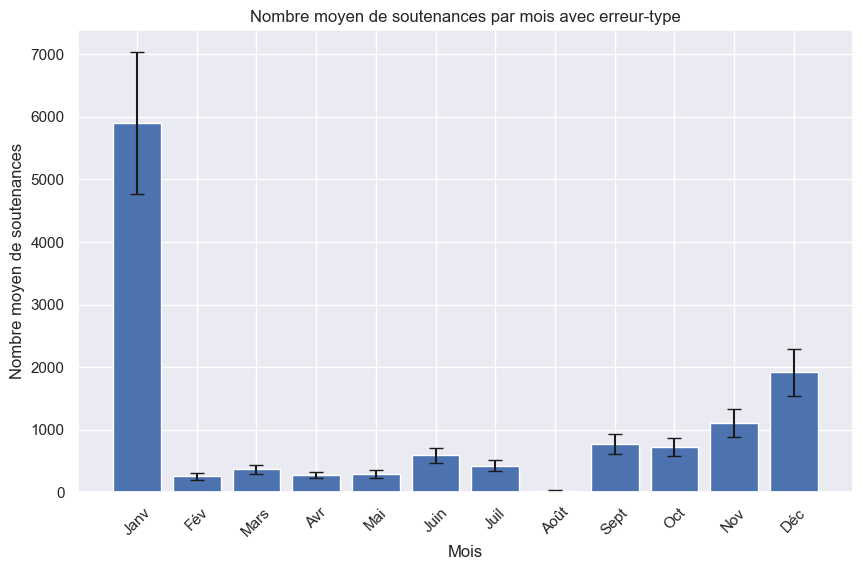

In [26]:

# Filtrer les années de 2005 à 2018
data = data[(data['Année'] >= 2005) & (data['Année'] <= 2018)]

# Extraire le mois de soutenance
data['Mois'] = pd.to_datetime(data['Date de soutenance']).dt.month

# Groupement par année et mois, puis compter les thèses
grouped = data.groupby(['Année', 'Mois']).size().reset_index(name='Count')

# Mapper les noms de mois abrégés en français avec l'ordre correct
month_names = {
    1: 'Janv', 2: 'Fév', 3: 'Mars', 4: 'Avr', 5: 'Mai', 6: 'Juin',
    7: 'Juil', 8: 'Août', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Déc'
}
grouped['Mois_abr'] = grouped['Mois'].map(month_names)

# Compiler toutes les années pour un seul graphique avec erreur-type
monthly_counts = grouped.groupby('Mois_abr')['Count'].mean()
monthly_std_error = grouped.groupby('Mois_abr')['Count'].std() / np.sqrt(grouped['Année'].nunique())

# Créer une liste ordonnée des mois abrégés en français
ordered_months = ['Janv', 'Fév', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc']

# Réorganiser les données selon l'ordre des mois français
monthly_counts = monthly_counts.reindex(ordered_months)
monthly_std_error = monthly_std_error.reindex(ordered_months)

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, yerr=monthly_std_error, capsize=5)
plt.xlabel('Mois')
plt.ylabel('Nombre moyen de soutenances')
plt.title('Nombre moyen de soutenances par mois avec erreur-type')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
# plt.savefig('figure5.png', bbox_inches='tight')
plt.show()



#### Analyse 

1. **Pics de soutenances** :
   - **Janvier et décembre** se distinguent comme les mois avec le plus grand nombre moyen de soutenances, avec janvier à 5900 soutenances et décembre à 1920 soutenances.
   - Cela confirme la tendance observée dans les années précédentes : de 2005 à 2013, janvier était le mois avec le plus grand nombre de soutenances, puis, à partir de 2014, décembre a pris le relais.

2. **Creux de soutenances** :
   - **Août** a le nombre le plus bas de soutenances, avec une moyenne de seulement 27 soutenances, ce qui est probablement dû aux vacances d'été.

3. **Variabilité des soutenances** :
   - Les erreurs-types montrent une variabilité notable dans les moyennes mensuelles. Par exemple, janvier et décembre ont les erreurs-types les plus élevées, ce qui reflète une plus grande variation dans le nombre de soutenances entre ces mois d'une année à l'autre.

4. **Mois intermédiaires** :
   - Les mois de février à novembre présentent des nombres de soutenances plus modérés et relativement stables, avec un léger pic en novembre (1109 soutenances) et une baisse en février (258 soutenances).

5. **Interprétation des erreurs-types** :
   - Les erreurs-types les plus élevées en janvier et décembre (1132 et 374 respectivement) suggèrent une grande variabilité des soutenances dans ces mois. Cela pourrait être dû à des variations dans les politiques académiques, les délais administratifs, ou les préférences des étudiants et des comités de soutenance.



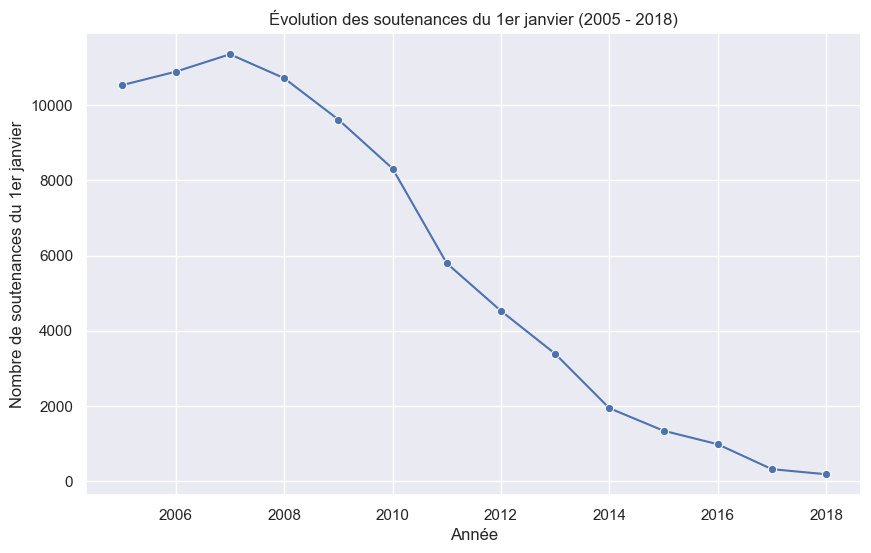

In [27]:
# Filtrer les données pour le 1er janvier
data_janvier = data[data['Date de soutenance'].dt.day == 1]

# Calculer le nombre de soutenances du 1er janvier par année
soutenances_janvier = data_janvier.groupby('Année').size().reset_index(name='Nombre de soutenances')


# Créer un graphique de l'évolution des soutenances du 1er janvier
plt.figure(figsize=(10, 6))
sns.lineplot(data=soutenances_janvier, x='Année', y='Nombre de soutenances', marker='o')
plt.xlabel('Année')
plt.ylabel('Nombre de soutenances du 1er janvier')
plt.title('Évolution des soutenances du 1er janvier (2005 - 2018)')
# plt.savefig('figure6.png', bbox_inches='tight')
plt.show()


Nous pouvons analyser l'évolution de la proportion des soutenances au 1er janvier de 2005 à 2018. Voici les observations clés :

**Augmentation initiale** : Entre 2005 et 2007, on observe une augmentation constante du nombre de soutenances, passant de 10 525 en 2005 à 11 350 en 2007, soit une hausse d'environ 8%.


**Diminution continue** : À partir de 2008, le nombre de soutenances commence à diminuer année après année. En 2018, on ne compte plus que 185 soutenances, soit une baisse d'environ 98% par rapport au pic de 2007.


**Déclin accéléré** : Le rythme de la baisse s'accélère à partir de 2011, avec des chutes plus importantes d'une année sur l'autre. Par exemple, entre 2010 et 2011, le nombre de soutenances passe de 8312 à    5794, soit une diminution de 30%.


**Tendance à long terme** : Dans l'ensemble, on observe une tendance à la baisse du nombre de soutenances au 1er janvier sur la période 2005-2018, avec un déclin particulièrement marqué à partir de 2011.

En résumé, la proportion des soutenances au 1er janvier a d'abord augmenté jusqu'en 2007, puis a connu une diminution continue et accélérée, traduisant probablement des évolutions structurelles dans le système de soutenance de thèses en France sur cette période.

### Proportion moyenne de soutenances (sans le mois de janvier)

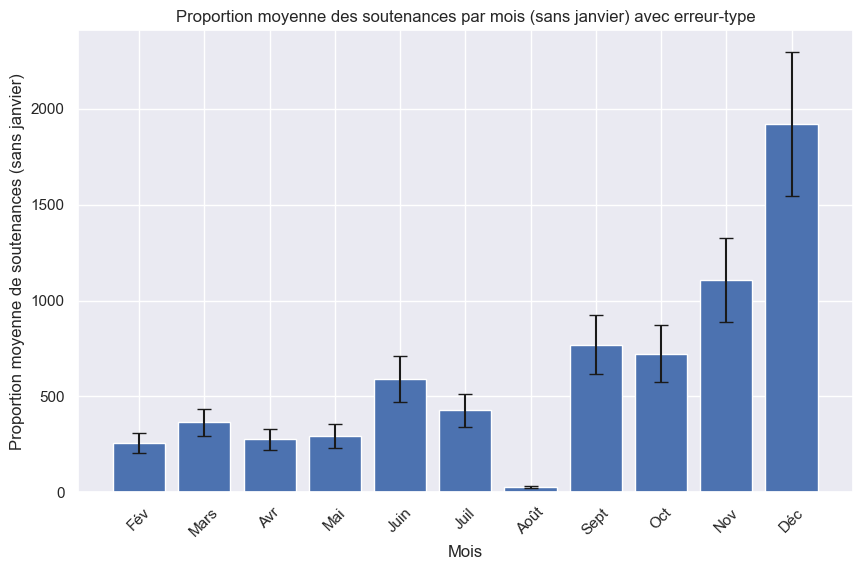

In [28]:
# Exclure les soutenances du premier janvier
data_no_jan1 = data[data['Mois'] != 1]

# Groupement par année et mois, puis compter les thèses
grouped_no_jan1 = data_no_jan1.groupby(['Année', 'Mois']).size().reset_index(name='Count')

# Calculer les proportions des soutenances par mois pour chaque année (sans janvier)
total_per_year_no_jan1 = grouped_no_jan1.groupby('Année')['Count'].transform('sum')

# Mapper les noms de mois abrégés en français avec l'ordre correct
month_names = {
    2: 'Fév', 3: 'Mars', 4: 'Avr', 5: 'Mai', 6: 'Juin',
    7: 'Juil', 8: 'Août', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Déc'
}
grouped_no_jan1['Mois_abr'] = grouped_no_jan1['Mois'].map(month_names)

# Compiler toutes les années pour un seul graphique avec erreur-type (sans janvier)
monthly_counts_no_jan1 = grouped_no_jan1.groupby('Mois_abr')['Count'].mean()
monthly_std_error_no_jan1 = grouped_no_jan1.groupby('Mois_abr')['Count'].std() / np.sqrt(grouped_no_jan1['Année'].nunique())

# Créer une liste ordonnée des mois abrégés en français
ordered_months = ['Fév', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc']

# Réorganiser les données selon l'ordre des mois français
monthly_counts_no_jan1 = monthly_counts_no_jan1.reindex(ordered_months)
monthly_std_error_no_jan1 = monthly_std_error_no_jan1.reindex(ordered_months)

plt.figure(figsize=(10, 6))
plt.bar(monthly_counts_no_jan1.index, monthly_counts_no_jan1.values, yerr=monthly_std_error_no_jan1, capsize=5)
plt.xlabel('Mois')
plt.ylabel('Proportion moyenne de soutenances (sans janvier)')
plt.title('Proportion moyenne des soutenances par mois (sans janvier) avec erreur-type')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
# plt.savefig('figure7.png', bbox_inches='tight')
plt.show()


**Le mois de soutenance préféré est: Décembre**

### IV. Outliers et résultats anormaux

### Question des homonymes chez les noms d’auteurs

In [29]:
# Utilisation des données untilales
data=df

In [30]:

# Vérifier si "Cécile Martin","Martin Cécile", "Cecile Martin","Martin Cecile" apparaît dans la colonne 'Auteur'
cecile_martin_filter = data[data['Auteur'].str.contains('Cécile Martin|Martin Cécile|Cecile Martin|Martin Cecile', case=False, na=False)]


cecile_martin_filter['Auteur'].value_counts()



Auteur
Cecile Martin                     7
CECILE MARTINOT AARRAS            1
Anne-Cecile Martin                1
Cecile Martineau                  1
Cecile Martinez-Percie du Sert    1
Cecile Martinat                   1
Cecile Martin-Chavigny            1
Name: count, dtype: int64

In [31]:
cecil_martin=cecile_martin_filter[cecile_martin_filter['Auteur']=='Cecile Martin']
cecil_martin

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_predi,Genre,etablissement_rec,Langue_rec,Année,Mois
61304,Cecile Martin,203208145,L'invention de l'ecran. De l'ecran de cheminee...,Laurent Jullier,Jullier Laurent,34210393,Sorbonne Paris Cite,<NA>,Etudes cinematographiques et audiovisuelles,soutenue,NaT,2017-01-16,2017,fr,2017USPCA018,non,26-09-11,03-10-17,SHS,female,USPC,Français,2017.0,1.0
167168,Cecile Martin,81323557,Systeme laitier et filiere lait au mexique : c...,JEAN LOSSOUARN,LOSSOUARN JEAN,<NA>,Institut national agronomique Paris-Grignon,26387859,Sciences biologiques fondamentales et applique...,soutenue,NaT,2000-01-01,2000,fr,2000INAP0034,non,08-07-17,10-12-19,Biologie,female,AgroParisTech,Français,2000.0,1.0
267927,Cecile Martin,179423568,"Concurrence, prix et qualite de la prise en ch...",Brigitte Dormont,Dormont Brigitte,29736889,Paris 9,27787109,Sciences economiques,soutenue,NaT,2014-01-24,2014,fr,2014PA090003,oui,26-09-11,05-12-17,Economie Gestion,female,Université Paris sciences et lettres,Français,2014.0,1.0
410608,Cecile Martin,81323557,Modelisation et criteres de combustibilite en ...,Gerard Antonini,Antonini Gerard,32192800,Compiegne,26570564,Genie des procedes industriels,soutenue,NaT,2001-01-01,2001,fr,2001COMP1380,non,24-05-13,08-07-20,Science de l'ingÃ©nieur,female,Université de technologie de Compiègne,Français,2001.0,1.0
415151,Cecile Martin,81323557,Caracterisation electrophysiologique et pharma...,Jean Mironneau,Mironneau Jean,95278966,Bordeaux 2,26403005,Neurosciences,soutenue,NaT,1991-01-01,1991,fr,1991BOR22005,non,24-05-13,07-07-20,Biologie,female,Université de Bordeaux,Français,1991.0,1.0
426731,Cecile Martin,81323557,Influence du ph ruminal sur la digestion des p...,Yves Briand,Briand Yves,91232910,Clermont-Ferrand 2,26403102,Sciences biologiques et fondamentales applique...,soutenue,NaT,1994-01-01,1994,fr,1994CLF21651,non,24-05-13,07-07-20,Psychologie,female,Université Clermont Auvergne,Français,1994.0,1.0
432450,Cecile Martin,182118703,Deposition d'energie par production de paires ...,Dominique Vautherin,Vautherin Dominique,32731965,Paris 11,26404664,Physique,soutenue,NaT,1989-01-01,1989,enfr,1989PA112163,non,26-09-11,07-07-20,"Materiaux, Milieux et Chimie",female,Université Paris-Saclay,Bilingue,1989.0,1.0


In [32]:


ID = cecil_martin['Identifiant auteur']
years = cecil_martin['Year']
research_topics = cecil_martin['Discipline']
affiliations = cecil_martin['Etablissement de soutenance']

# Créer un DataFrame avec les résultats
resultat = pd.DataFrame({
    "ID": ID,
    "years": years,
    "research_topics": research_topics,
    "affiliations": affiliations
})

# Regrouper par identifiant auteur et compter les occurrences
grouped_result = resultat.groupby('ID').count()
grouped_result


,years,research_topics,affiliations
ID,,,
81323557,4,4,4
179423568,1,1,1
182118703,1,1,1
203208145,1,1,1




## Enquête sur les homonymes : le cas de Cécile Martin

L'analyse des données concernant Cécile Martin révèle plusieurs thèses portant le même nom d'auteur.

**Objectif:** Comprendre les raisons de ces résultats et proposer des interprétations possibles.

**Méthodologie:**

- Analyse des informations disponibles pour chaque thèse de Cécile Martin :
  - Titre de la thèse
  - Discipline
  - Établissement de soutenance
  - Date de soutenance
  - Identifiant auteur

- Identification des éléments distinctifs entre les différentes thèses.
- Formulation d'hypothèses explicatives.

**Résultats:**

| Thèse | Titre                                              | Discipline                                      | Établissement                          | Date     | Identifiant Auteur | Observations                      |
|-------|----------------------------------------------------|------------------------------------------------|---------------------------------------|----------|--------------------|-----------------------------------|
| 1     | L'invention de l'ecran. De l'ecran de cheminee...  | Études cinématographiques et audiovisuelles    | Sorbonne Paris Cité                   | 2017     | 203208145          |                                   |
| 2     | Système laitier et filière lait au Mexique        | Sciences biologiques fondamentales et appliquées | Institut national agronomique Paris-Grignon | 2000     | 81323557           |                                   |
| 3     | Concurrence, prix et qualité de la prise en charge | Sciences économiques                            | Paris 9                                | 2014     | 179423568          |                                   |
| 4     | Modélisation et critères de combustibilité         | Génie des procédés industriels                  | Compiègne                              | 2001     | 81323557           | Même identifiant auteur que thèse 2 |
| 5     | Caractérisation électrophysiologique et pharmaco... | Neurosciences                                   | Bordeaux 2                             | 1991     | 81323557           | Même identifiant auteur que thèses 2 et 4 |
| 6     | Influence du pH ruminal sur la digestion des prot  | Sciences biologiques fondamentales et appliquées | Clermont-Ferrand 2                     | 1994     | 81323557           | Même identifiant auteur que thèses 2, 4 et 5 |
| 7     | Déposition d'énergIV. Outliers et résultats anormauxie par production de paires...   | Physique                                        | Paris 11                               | 1989     | 182118703          |                                   |

**Interprétations possibles:**

1. **Homonymie réelle:** Plusieurs personnes portant le même nom ont soutenu une thèse. Les informations disponibles ne permettent pas de confirmer ou d'infirmer cette hypothèse.
2. **Erreur de saisie:** Des erreurs de saisie lors de l'enregistrement des données pourraient expliquer la présence de plusieurs thèses sous le même nom.
3. **Identifiant auteur non unique:** L'identifiant auteur ne semble pas être unique, comme le montrent les thèses 2, 4, 5 et 6. Cela pourrait indiquer un problème de gestion des identifiants ou une absence de standardisation.
4. **Changement de nom:** Cécile Martin pourrait avoir changé de nom après la soutenance de certaines thèses.

**Propositions d'interprétations des résultats :**

1. **Coïncidence:** Il est possible que ces personnes partagent simplement le même nom sans aucun lien entre elles, à l'exception de l'univers académique.
2. **Lien familial:** Certaines Cécile Martin pourraient être apparentées ou liées à d'autres par le sang ou le mariage, ce qui expliquerait la similarité de leur nom.
3. **Nom de famille commun:** Le nom Martin est relativement courant en France et il est possible que ces personnes n'aient aucun lien familial ou personnel, mais partagent simplement un nom de famille commun.
4. **Noms composés:** Il est également possible que certaines Cécile Martin aient un deuxième prénom ou un nom de famille composé, ce qui pourrait expliquer pourquoi elles apparaissent dans la recherche initiale.

### Conclusion:

Le cas de Cécile Martin met en lumière les difficultés liées à la gestion des homonymes dans les bases de données bibliographiques. Une analyse approfondie des données et la mise en place de procédures de vérification et de standardisation sont nécessaires pour garantir la fiabilité des informations.



# Détection d’outliers

In [33]:
donne=df

In [34]:
file1 = 'C:/Users/KRISTIAN/Desktop/Cy cergy pontoise/Manipulation et prétraitement de données/Données/directeur_counts.csv'

In [35]:
donne=df
# Filtrer les colonnes pertinentes
donne = data[['Directeur de these (nom prenom)', 'Year']]

# Filtrer les données pour la période 1984-2018
donne = donne[(donne['Year'] >= 1984) & (donne['Year'] <= 2018)]

# Séparer les directeurs de thèse en cas de multiples directeurs
donne['Directeur de these (nom prenom)'] = donne['Directeur de these (nom prenom)'].str.split(',')

# Exploser les listes de directeurs en lignes séparées
donne = donne.explode('Directeur de these (nom prenom)')

# Supprimer les espaces en trop autour des noms
donne['Directeur de these (nom prenom)'] = donne['Directeur de these (nom prenom)'].str.strip()

# Compter le nombre de thèses par directeur
directeur_counts = donne['Directeur de these (nom prenom)'].value_counts().reset_index()
directeur_counts.columns = ['Directeur de these (nom prenom)', 'Nombre de theses']

# Sauvegarder le résultat dans un nouveau fichier CSV
# directeur_counts.to_csv(file1, index=False)


In [36]:
data_filtered=pd.read_csv(file1)

In [37]:
data_filtered.head()

,Directeur de these (nom prenom),Nombre de theses
0,Directeur de these inconnu,711
1,Blanc Francois-Paul,227
2,Scherrmann Jean-Michel,209
3,Brunel Pierre,206
4,Pujolle Guy,196


In [38]:

# Filtrer les directeurs de thèse connus
data_filtered = data_filtered[data_filtered["Directeur de these (nom prenom)"] != "Directeur de these inconnu"]
data_filtered 

,Directeur de these (nom prenom),Nombre de theses
1,Blanc Francois-Paul,227
2,Scherrmann Jean-Michel,209
3,Brunel Pierre,206
4,Pujolle Guy,196
5,Bertucat Michel,173
...,...,...
101229,Kesse-Guyot Emmanuelle,1
101230,Bouillier Veronique,1
101231,Prayer Mario,1
101232,Ten Kortenaar Neil,1


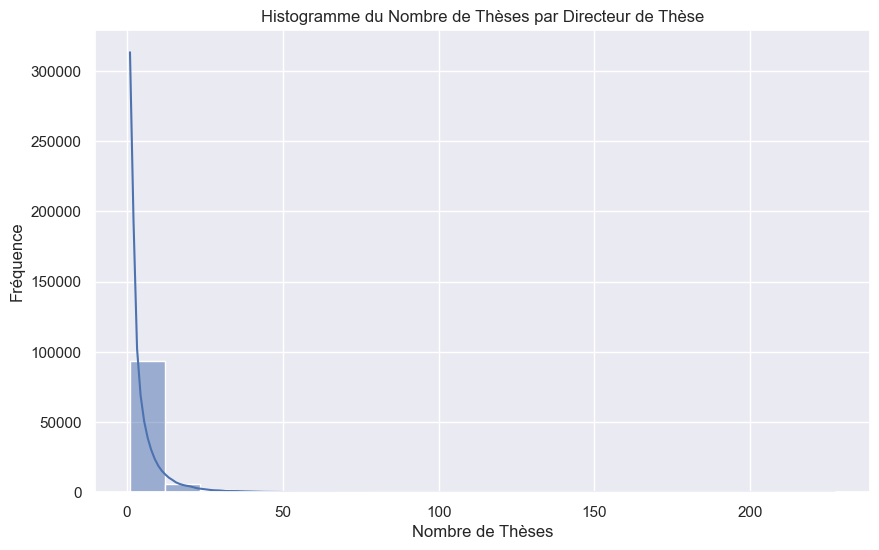

In [39]:
# Configurer le style de Seaborn
sns.set(style='darkgrid')

# Créer l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['Nombre de theses'], bins=20, kde=True)

# Ajouter les titres et labels
plt.title('Histogramme du Nombre de Thèses par Directeur de Thèse')
plt.xlabel('Nombre de Thèses')
plt.ylabel('Fréquence')

# plt.savefig('figure8.png', bbox_inches='tight')

# Afficher le graphique
plt.show()



Nous remarquons que la distribution du nombre de thèses par directeur de thèse n'est pas normale. Pour la détection des outliers, nous allons utiliser l'écart interquartile (IQR).

In [40]:
import pandas as pd
import numpy as np

# Définir la fonction pour détecter les outliers en utilisant la méthode IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


# Utiliser la fonction pour détecter les outliers
outliers = detect_outliers_iqr(data_filtered['Nombre de theses'])

# Ajouter une colonne 'outlier' pour marquer les valeurs aberrantes
data_filtered = data_filtered.copy()  # Faire une copie explicite pour éviter les avertissements
data_filtered.loc[:, 'outlier'] = data_filtered['Nombre de theses'].apply(lambda x: 'Oui' if x in outliers.values else 'Non')

# Filtrer les données pour obtenir les outliers
outliers_data = data_filtered[data_filtered['outlier'] == 'Oui']

# Trier les données en fonction de la colonne "Nombre de theses"
sorted_outliers = outliers_data.sort_values(by="Nombre de theses")
name=sorted_outliers['Directeur de these (nom prenom)']
# Afficher les résultats
print("Outliers identifiés par IQR :")
outliers=sorted_outliers[['Directeur de these (nom prenom)', 'Nombre de theses']].sort_values('Nombre de theses', ascending=False)
outliers.head()

Outliers identifiés par IQR :


,Directeur de these (nom prenom),Nombre de theses
1,Blanc Francois-Paul,227
2,Scherrmann Jean-Michel,209
3,Brunel Pierre,206
4,Pujolle Guy,196
5,Bertucat Michel,173


**Nous allons ici calculer le nombre des these encadré par les directeur en se basant sur les identifiant des directeurs**

In [41]:
# Filtrer les colonnes pertinentes
directeur = df[['Identifiant directeur', 'Directeur de these (nom prenom)']]

# Supprimer les valeurs manquantes dans les colonnes 'Identifiant directeur' et 'Directeur de these (nom prenom)'
directeur = directeur.dropna(subset=['Identifiant directeur', 'Directeur de these (nom prenom)'])

# Compter le nombre de thèses encadrées par chaque directeur
directeur['Nombre de theses'] = directeur.groupby(['Identifiant directeur', 'Directeur de these (nom prenom)'])['Identifiant directeur'].transform('size')

# Supprimer les doublons pour n'avoir qu'une ligne par directeur
directeur = directeur.drop_duplicates(subset=['Identifiant directeur', 'Directeur de these (nom prenom)'], keep='first')

# Trier les résultats par nombre de thèses en ordre décroissant
directeur = directeur.sort_values('Nombre de theses', ascending=False)

# Afficher le résultat final
directeur.head()


,Identifiant directeur,Directeur de these (nom prenom),Nombre de theses
90396,59375140,Scherrmann Jean-Michel,208
196,26730774,Blanc Francois-Paul,201
3161,26756625,Brunel Pierre,194
0,29561248,Delebecque Philippe,178
90157,98531891,Bertucat Michel,173


In [42]:
import pandas as pd

# Assurez-vous que les noms des colonnes sont identiques
outliers.columns = ['Directeur de these (nom prenom)', 'Nombre de theses']
directeur.columns = ['Identifiant directeur', 'Directeur de these (nom prenom)', 'Nombre de theses']

# Effectuez la jointure des deux dataframes sur la colonne 'Directeur de these (nom prenom)'
merged_df = pd.merge(outliers, directeur, on='Directeur de these (nom prenom)', suffixes=('_outliers', '_directeur'))

# Affichez le résultat de la jointure
merged_df.head()


,Directeur de these (nom prenom),Nombre de theses_outliers,Identifiant directeur,Nombre de theses_directeur
0,Blanc Francois-Paul,227,26730774,201
1,Scherrmann Jean-Michel,209,59375140,208
2,Brunel Pierre,206,26756625,194
3,Brunel Pierre,206,30616123,1
4,Brunel Pierre,206,116052384,1


### procedure utiliser pour decteter les outliers

j'ai commencé par créer un nouveau jeu de données à partir du jeu de données initial, en me concentrant sur les directeurs de thèse. J'ai conservé les colonnes "Directeur de these (nom prenom)" et "Nombre de theses" pour chaque directeur/directrice. J'ai ensuite identifié les individus ayant encadré un nombre anormalement élevé de thèses en calculant le troisième quartile (Q3) et l'écart interquartile (IQR) du nombre de thèses encadrées. J'ai considéré comme outliers les directeurs ayant encadré plus de Q3 + 1.5 * IQR thèses.

Ensuite, pour enquêter sur ces outliers, j'ai effectué une jointure entre le dataframe des outliers et le dataframe initial sur la colonne "Directeur de these (nom prenom)". Cela m'a permis d'obtenir les identifiants des directeurs outliers et de vérifier s'il y avait des erreurs dans les données.

Voici un exemple de la jointure pour les cinq premiers outliers :

| Directeur de these (nom prenom) | Nombre de theses_outliers | Identifiant directeur | Nombre de theses_directeur |
|---------------------------------|-------------------------|-----------------------|-------------------------|
| Blanc Francois-Paul             | 227                     | 26730774              | 201                     |
| Scherrmann Jean-Michel          | 209                     | 59375140              | 208                     |
| Brunel Pierre                   | 206                     | 26756625              | 194                     |
| Brunel Pierre                   | 206                     | 30616123              | 1                       |
| Brunel Pierre                   | 206                     | 116052384             | 1                       |

En examinant les données, j'ai remarqué que certains directeurs outliers avaient des identifiants différents pour le même nom et prénom, ce qui pourrait indiquer des erreurs de saisie ou des homonymes. Par exemple, "Brunel Pierre" a trois identifiants différents et des nombres de thèses encadrées différents. Pour vérifier s'il s'agit d'erreurs ou d'homonymes, j'ai effectué des recherches supplémentaires sur ces directeurs en utilisant des sources externes, telles que les sites web des universités ou les bases de données de publications.

Dans le cas de "Brunel Pierre", j'ai trouvé qu'il y avait effectivement plusieurs directeurs de thèse portant ce nom dans différentes universités. Par conséquent, il est probable que les données pour "Brunel Pierre" soient correctes et qu'il s'agisse d'homonymes plutôt que d'erreurs. Cependant, pour confirmer cela, il serait nécessaire de vérifier chaque thèse individuellement pour s'assurer que le directeur est bien le même "Brunel Pierre" pour chaque thèse.

En conclusion, pour déterminer si les outliers sont des erreurs ou des homonymes, il est nécessaire d'effectuer des recherches supplémentaires en utilisant des sources externes et de vérifier chaque thèse individuellement pour s'assurer que le directeur est bien le même pour chaque thèse.

# Obtention de résultats préliminaires

### ###

In [43]:
data['Langue_rec'].value_counts()

Langue_rec
Français    334427
Anglais      30947
Bilingue     15372
Autre         3162
Name: count, dtype: int64

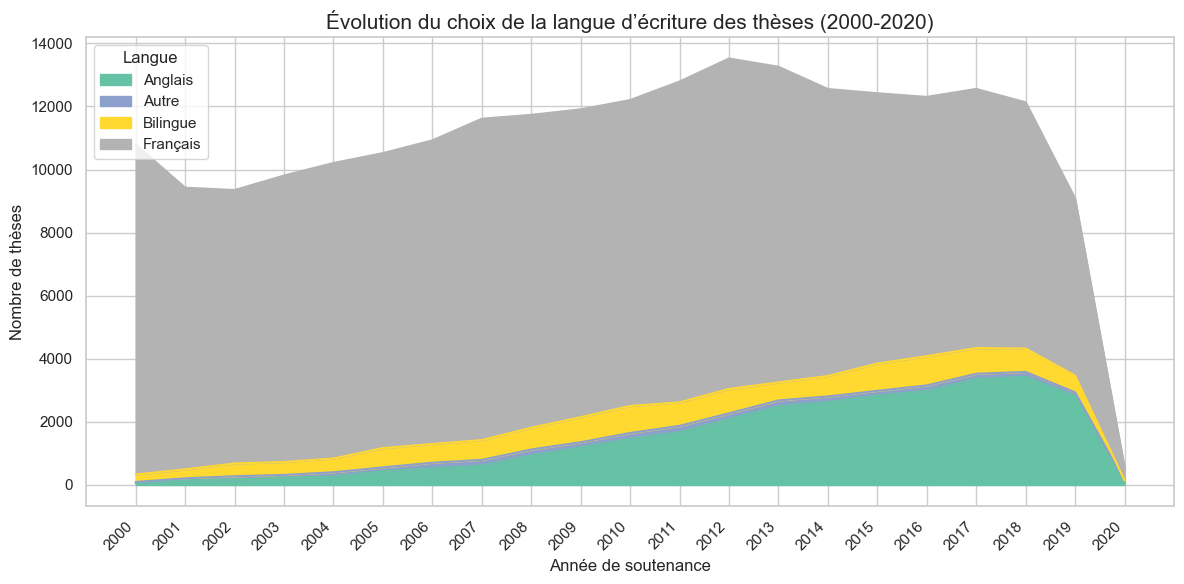

In [44]:
# Filtrer les colonnes pertinentes
donne = data[['Directeur de these (nom prenom)', 'Year', 'Langue_rec']]

# Convertir la colonne Year en numérique
donne.loc[:, 'Year'] = pd.to_numeric(donne['Year'], errors='coerce')

# Supprimer les valeurs NaN
donne = donne.dropna(subset=['Year'])

# Convertir de nouveau pour s'assurer que toutes les valeurs sont numériques
donne.loc[:, 'Year'] = donne['Year'].astype(int)

# Filtrer les données pour les deux dernières décennies
data_recent = donne[(donne['Year'] >= 2000) & (donne['Year'] <= 2020)]

# Compter le nombre de thèses par année et par langue
data_grouped = data_recent.groupby(['Year', 'Langue_rec']).size().unstack().fillna(0)

# Utiliser un style de seaborn
sns.set_style('whitegrid')

# Définir une palette de couleurs
palette = 'Set2'

# Créer l'area chart
data_grouped.plot(kind='area', stacked=True, figsize=(12, 6), colormap=palette)

# Ajouter les titres et labels
plt.title("Évolution du choix de la langue d’écriture des thèses (2000-2020)", fontsize=15)
plt.xlabel("Année de soutenance", fontsize=12)
plt.ylabel("Nombre de thèses", fontsize=12)
plt.legend(title='Langue', loc='upper left')

# Spécifier manuellement les positions des étiquettes de l'axe x
plt.xticks(ticks=range(2000, 2021), rotation=45, ha='right')

# Ajuster l'espacement pour une meilleure apparence visuelle
plt.tight_layout()

# Sauvegarder la figure
plt.savefig('figure22.png', bbox_inches='tight')

# Afficher le graphique
plt.show()


### Observation

1. **Tendances Générales**:
   - Le nombre total de thèses soutenues a augmenté de manière significative de 2000 à 2010, puis a atteint un plateau avant de légèrement diminuer à partir de 2018.
   - La langue française (représentée en gris) est de loin la langue la plus utilisée pour la rédaction des thèses tout au long de la période étudiée.

2. **Distribution des Langues**:
   - **Français**: Domine largement le choix de langue pour la rédaction des thèses, bien que son pourcentage relatif ait légèrement diminué au fil des années.
   - **Anglais** (représenté en vert): Montre une tendance à la hausse continue, indiquant une adoption croissante de l'anglais pour la rédaction des thèses.
   - **Bilingue** (représenté en jaune): A également augmenté, bien que de manière plus modérée par rapport à l'anglais.
   - **Autres Langues** (représentées en bleu): Restent une minorité, mais montrent une légère augmentation.

3. **Évolutions Notables**:
   - La période de 2005 à 2010 a vu une augmentation rapide du nombre total de thèses, toutes langues confondues.
   - Après 2010, bien que le nombre total de thèses continue de croître, la croissance ralentit, et une diminution est observée après 2018.

### Interprétation

1. **Prévalence du Français**:
   - Le français demeure la langue dominante pour la rédaction des thèses en France, ce qui reflète probablement les politiques linguistiques nationales et l'importance du français dans l'enseignement supérieur et la recherche.

2. **Croissance de l'Anglais**:
   - L'augmentation de l'anglais pourrait être attribuée à la mondialisation de la recherche et à la nécessité de publier dans une langue largement comprise pour atteindre un public international. Cette tendance est cohérente avec l'augmentation des collaborations internationales et des programmes de doctorat en anglais.

3. **Stabilisation et Déclin Récents**:
   - Le plateau et le déclin après 2018 peuvent suggérer des changements dans les politiques d'enseignement supérieur, une saturation du nombre de doctorants, ou peut-être des changements économiques ou sociaux influençant les inscriptions en doctorat.

4. **Impact des Thèses Bilingues**:
   - L'augmentation des thèses bilingues pourrait refléter une stratégie pour maximiser l'impact et la compréhension des travaux de recherche à la fois dans la communauté locale et internationale.

En résumé, ce graphique montre non seulement les préférences linguistiques pour la rédaction des thèses en France au cours des deux dernières décennies, mais aussi des tendances plus larges dans le monde de la recherche académique en réponse à la mondialisation et aux dynamiques locales.